In [1]:
import warnings; warnings.filterwarnings("ignore", message="Initializing zero-element tensors is a no-op")
import pandas as pd
import torch
import os 

from models.faceresnet18 import FaceResNet18
from models.faceresnet50 import FaceResNet50
from eval_utils import eval_epoch
from utils import transform

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

IMAGES_PATH = './data/CASIA/casia-faces/'
DF_PATH = './data/CASIA/'
CHECKPOINTS_PATH = './checkpoints/'

In [2]:
# model = FaceResNet18(n_classes=97, emb_size=256).to(device)
# model.load_state_dict(torch.load(os.path.join(CHECKPOINTS_PATH, 'epoch_30.pt')))

model = FaceResNet50().to(device)
path = os.path.join(CHECKPOINTS_PATH, 'epoch_38_boa.pt')
model = FaceResNet50.load_checkpoint(path)

In [3]:
val_df = pd.read_csv(os.path.join(DF_PATH, 'val.csv'))
val_df['path'] = val_df['path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

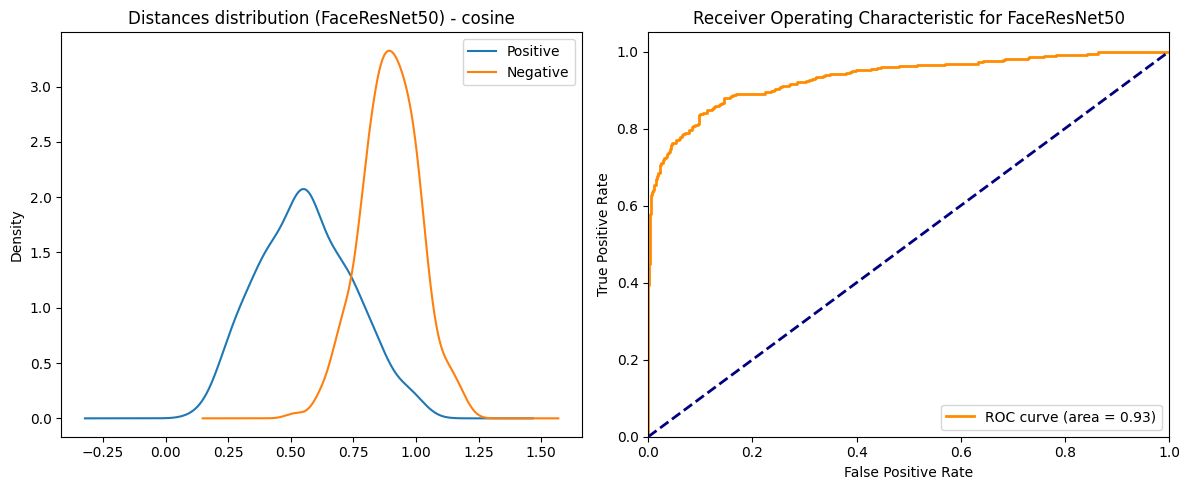

Target FAR: 1e-03 | Threshold: 0.5028
[FaceResNet50] Accuracy: 0.6963
[FaceResNet50] VAL: 0.3926

[FaceResNet50] Positive mean: 0.5583 ± 0.1858
[FaceResNet50] Negative mean: 0.8955 ± 0.1167


In [4]:
eval_epoch(
    model=model, 
    val_df=val_df, 
    transform=transform, 
    n_pairs=1024,
    batch_size=128,
    device=device, 
    target_far=1e-3, # 1e-3 = 0.1%
    metric='cosine'
)